# Study of Correlation Between Building Demolition and Associated Features

+  Capstone Project for Data Science at Scale on Coursera
+  Repo is located [here](https://github.com/cyang019/blight_fight)

**Chen Yang** [yangcnju@gmail.com](yangcnju@gmail.com)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

## Objective

Build a model to make predictions on blighted buildings based on real data from [data.detroitmi.gov](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf/data) as given by coursera. 

Building demolition is very important for the city to turn around and revive its economy. However, it's no easy task. Accurate predictions can provide guidance on potential blighted buildings and help avoid complications at early stages.

## Building List

The buildings were defined as described below:

1.  Building sizes were estimated using parcel info downloaded [here](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf/data) at data.detroitmi.gov. Details can be found in [this notebook](https://github.com/cyang019/blight_fight/blob/master/src/Building_size_estimation.ipynb).
2.  A event table was constructed from the 4 files (detroit-311.csv, detroit-blight-violations.csv, detroit-crime.csv, and detroit-demolition-permits.tsv) using their coordinates, as shown [here](https://github.com/cyang019/blight_fight/blob/master/src/Cleaning_data.ipynb).
3.  Buildings were defined using these coordinates with an estimated building size (median of all parcels). Each building was represented as a same sized rectangle.

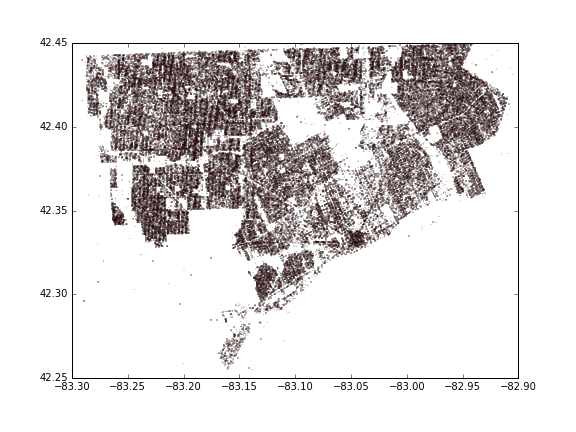

In [3]:
# The resulted buildings:
Image("./data/buildings_distribution.png")

## Features

Three kinds (311-calls, blight-violations, and crimes) of incident counts and coordinates (normalized) was used in the end. I also tried to generate more features by differentiating each kind of crimes or each kind of violations in this [notebook](https://github.com/cyang019/blight_fight/blob/master/src/Feature_Engineering.ipynb). However, these differentiated features lead to smaller AUC scores.

## Data

+  The buildings were down-sampled to contain same number of blighted buildings and non-blighted ones. 
+  The ratio between train and test was set at a ratio of 80:20. 
+  During training using xgboost, the train data was further separated into train and evaluation with a ratio of 80:20 for monitoring.

## Model

+  A **Gradient Boosted Tree** model using [Xgboost](xgboost.readthedocs.io) achieved AUC score of 0.85 on evaluation data set:

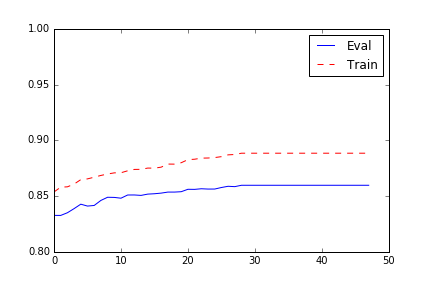

In [4]:
Image('./data/train_process.png')

+  This model resulted in an AUC score of **0.858** on test data. Feature importances are shown below:

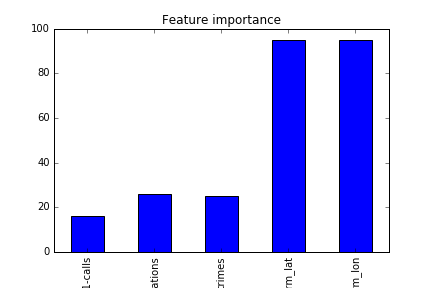

In [5]:
Image('./data/feature_f_scores.png')

Locations were most important features in this model. Although I tried using more features generated by differentiating different kind of crimes or violations, the AUC scores did not improve.

+  Feature importance can also be viewed using tree representation:

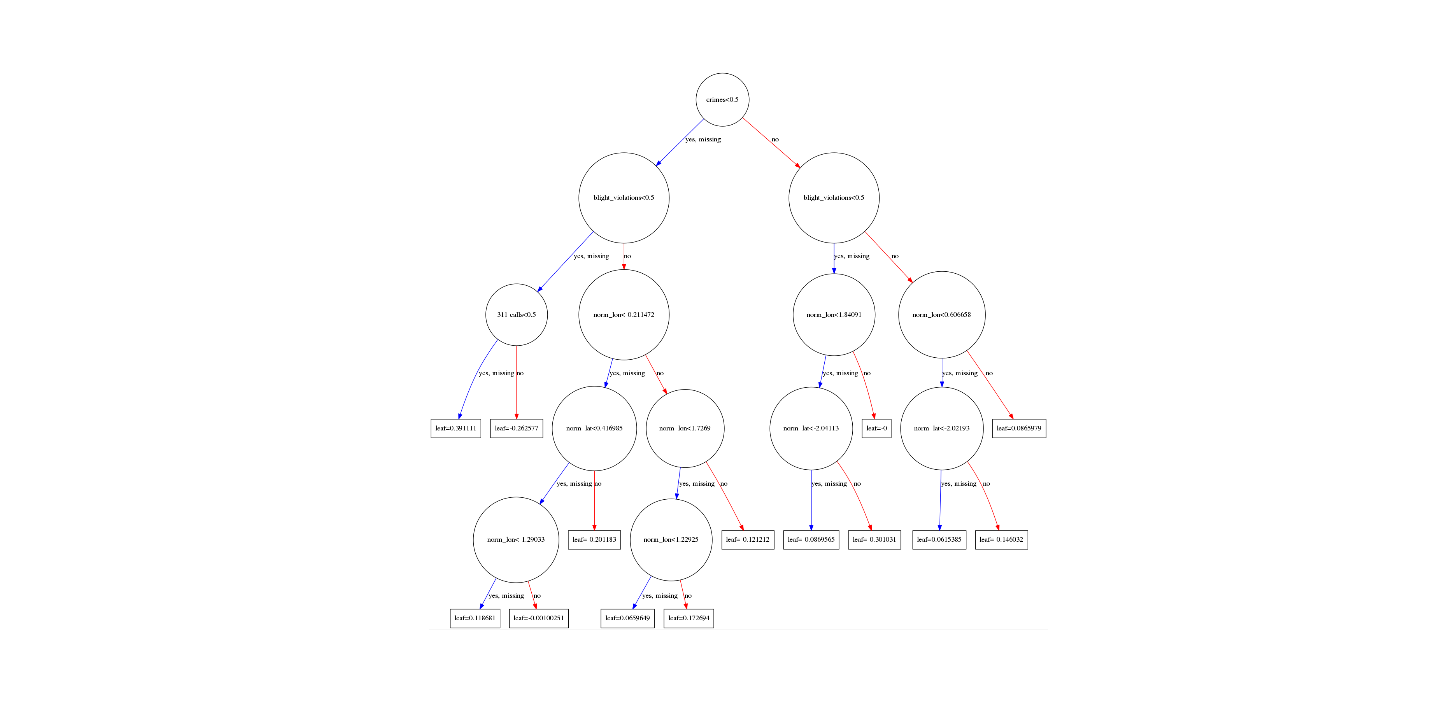

In [6]:
Image('./data/bst_tree.png')

+  To reduce variance of the model, since overfitting was observed during training. I also tried to reduce variance by including in more nonblighted buildings by sampling again multiple times with replacement (**bagging**).
+  A final AUC score of **0.8625** was achieved. The resulted ROC Curve on test data is shown below:

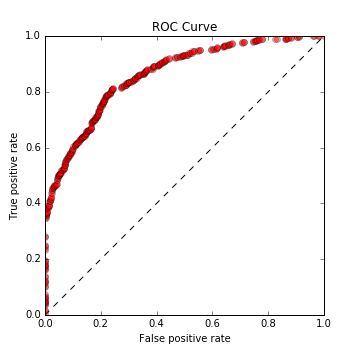

In [7]:
Image('./data/ROC_Curve_combined.png')

## Discussion

Several things worth trying:

+  Using neural net to study more features generated from differentiated crimes or violations if given more time.
+  Taken into account possibilities that a building might blight in the future.

# Thanks for your time reading the report!